# Project Name: Hotel Room Price Prediction 

The main aim of this project is to predict the hotel room price based on various features 

Dataset to downloaded from the below link

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

    In the lifecycle of a Data Science project, I am performing:

    Data Analysis
    Feature Engineering
    Feature Selection
    Model Building
    Model Deployment

# Data Analysis

In [2]:
# Import the package for analysis purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset 
dataSet = pd.read_csv('hotel_bookings.csv')

    About dataset 

    1. hotel: Indicates whether the booking is for a hotel.
    2. is_canceled: Specifies if the booking was canceled.
    3. lead_time: Number of days between booking and arrival.
    4. arrival_date_year: The year of arrival date.
    5. arrival_date_month: The month of arrival date.
    6. arrival_date_week_number: Week number of the arrival date.
    7. arrival_date_day_of_month: Day of the month of the arrival date.
    8. stays_in_weekend_nights: Number of weekend nights stayed.
    9. stays_in_week_nights: Number of weekday nights stayed.
    10. adults: Number of adults.
    11. children: Number of children.
    12. babies: Number of babies.
    13. meal: Type of meal booked.
    14. country: Country of origin.
    15. market_segment: Market segment designation.
    16. distribution_channel: Distribution channel for booking.
    17. is_repeated_guest: Indicates if the guest is a repeated guest.
    18. previous_cancellations: Number of previous cancellations by the guest.
    19. previous_bookings_not_canceled: Number of previous bookings not canceled by the  guest.
    20. reserved_room_type: Type of room reserved.
    21. assigned_room_type: Type of room assigned at check-in.
    22. booking_changes: Number of changes made to the booking.
    23. deposit_type: Type of deposit made for the booking.
    24. agent: ID of the travel agency that made the booking.
    25. company: ID of the company that made the booking.
    26. days_in_waiting_list: Number of days the booking was on the waiting list before  confirmed.
    27. customer_type: Type of booking customer.
    28. adr: Average Daily Rate (price) for the booking.
    29. required_car_parking_spaces: Number of car parking spaces required by the guest.
    30. total_of_special_requests: Total number of special requests made by the guest.
    31. reservation_status: Reservation last status, showing if canceled or not.
    32. reservation_status_date: Date at which the last status was set for the           reservation.

In [4]:
# Copy the dataset to the 'df' variable.
df = dataSet.copy()

In [10]:
df.shape

(119390, 32)

In [5]:
# Basic analysis
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
df.describe(include='O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


    In the data analysis field, I analyze the following:

    Missing Values
    All the Numerical Variables
    Distribution of the Numerical Variables
    Categorical Variables
    Cardinality of Categorical Variables
    Outliers
    Relationship between independent and dependent features (ADR)

# Missing values

In [12]:
pd.DataFrame(df.isna().sum())

In [14]:
# There are missing values in the four columns.
nanFeatures

['children', 'country', 'agent', 'company']

In [16]:
df[nanFeatures].head()

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN


In [27]:
for feature in nanFeatures:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

children 0.0  % missing values
country 0.0041  % missing values
agent 0.1369  % missing values
company 0.9431  % missing values


## Check the relationship of missing values with the price feature.

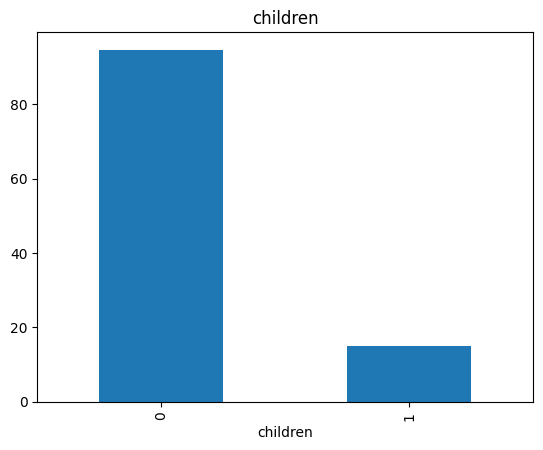

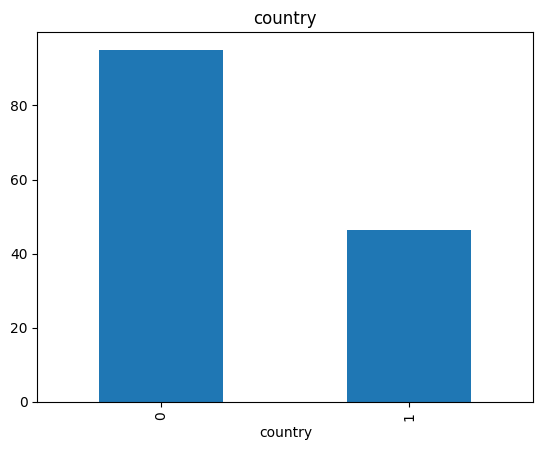

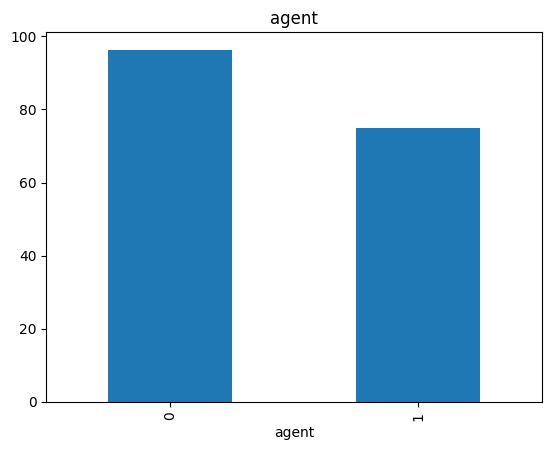

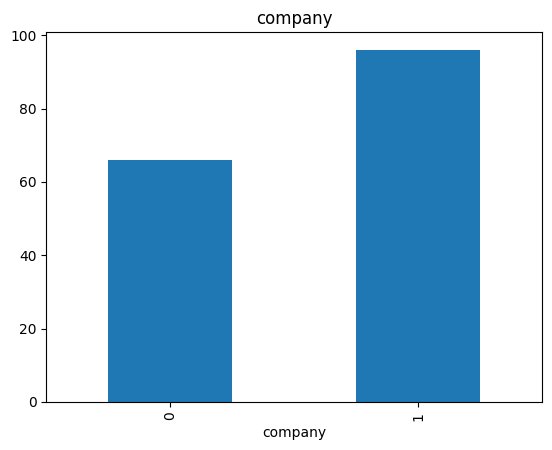

In [28]:
for feature in nanFeatures:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['adr'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here, the relationship between the missing values and the dependent variable is clearly visible. Therefore, I handle the missing values in the feature engineering section

# Numerical Values 

In [32]:
numericalFeature = [feature for feature in df.columns if df[feature].dtype != 'O']

In [39]:
print('Number of numerical variables:{}'.format(len(numericalFeature)))

Number of numerical variables:20


In [40]:
df[numericalFeature].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


    Numerical variables are two types
    -> continuous variable
    -> discrete variable 

Discrete variable 

In [45]:
discreteFeature = [feature for feature in numericalFeature if(len(df[feature].unique()) < 25)]
print('Discrete variable count:{}'.format(len(discreteFeature)))

Discrete variable count:11


In [47]:
df[discreteFeature].head()

,is_canceled,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0,2015,0,2,0.0,0,0,0,3,0,0
1,0,2015,0,2,0.0,0,0,0,4,0,0
2,0,2015,0,1,0.0,0,0,0,0,0,0
3,0,2015,0,1,0.0,0,0,0,0,0,0
4,0,2015,0,2,0.0,0,0,0,0,0,1


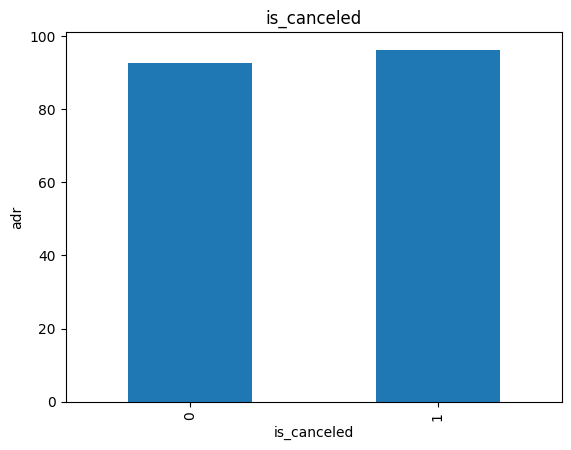

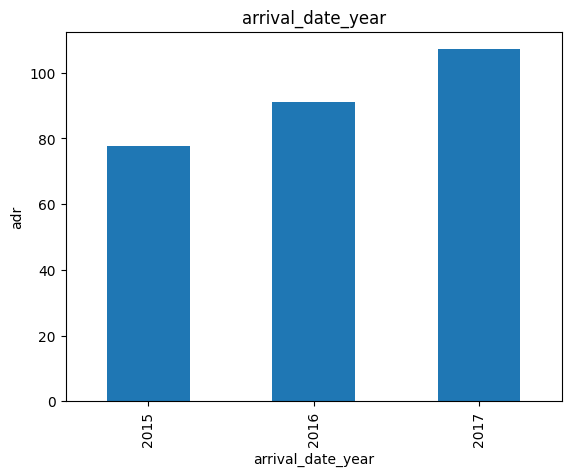

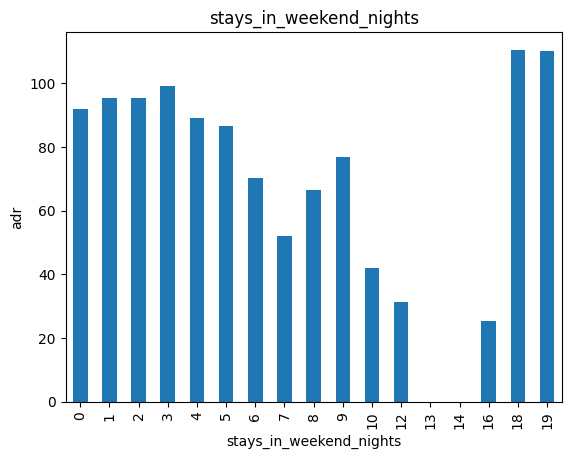

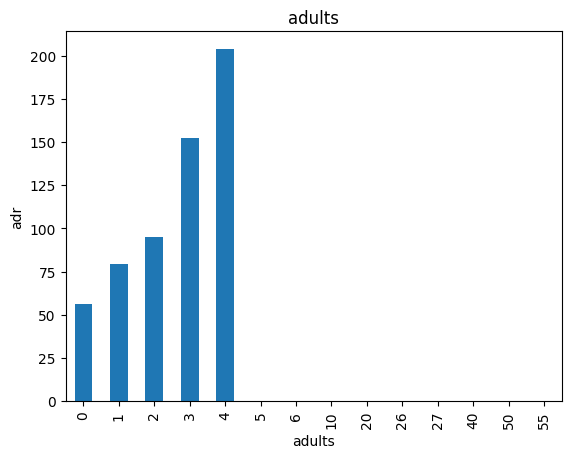

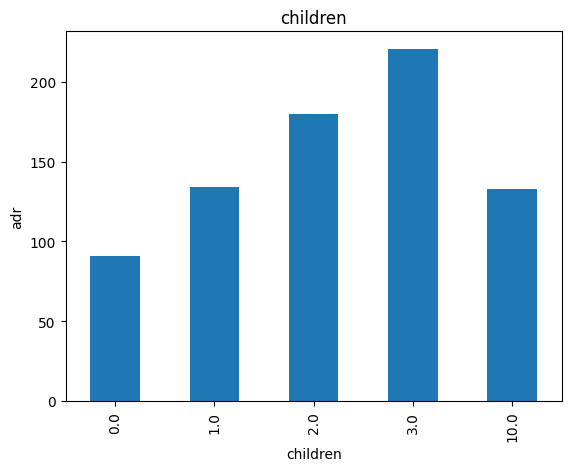

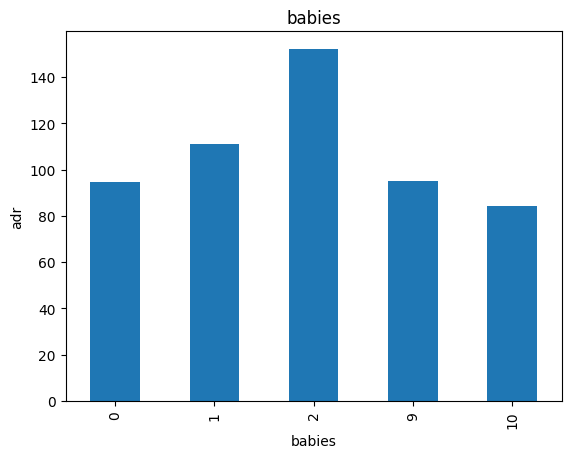

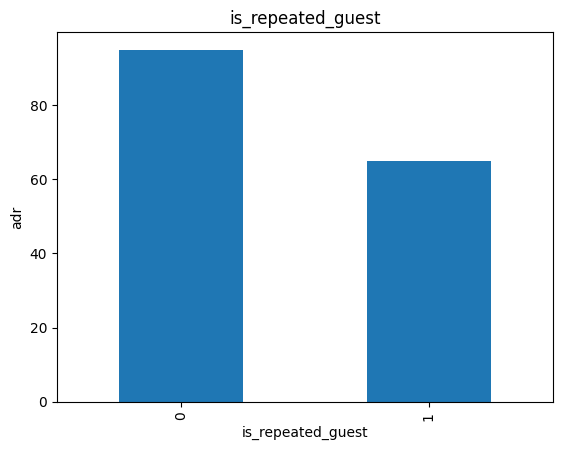

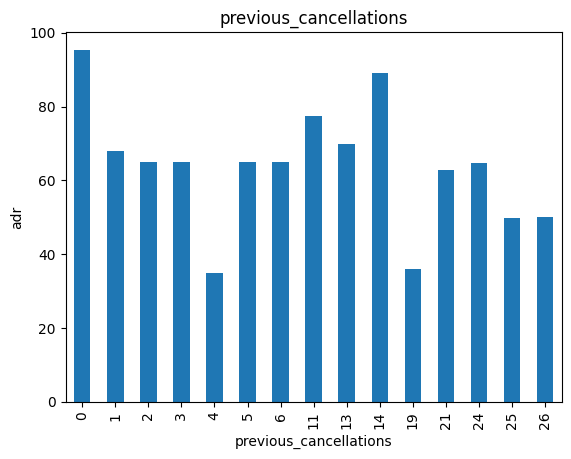

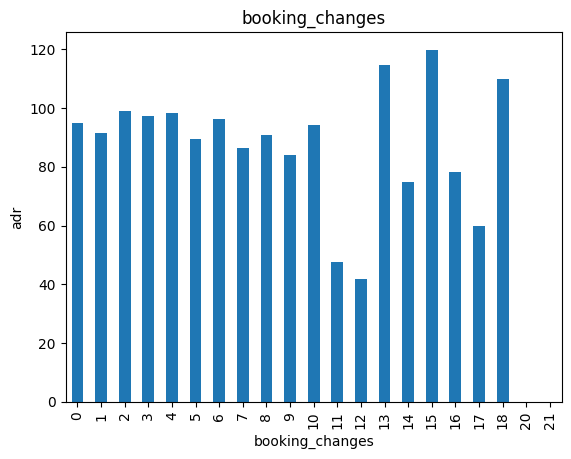

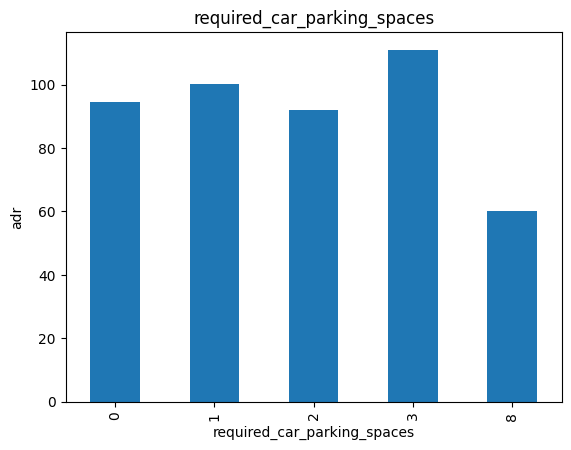

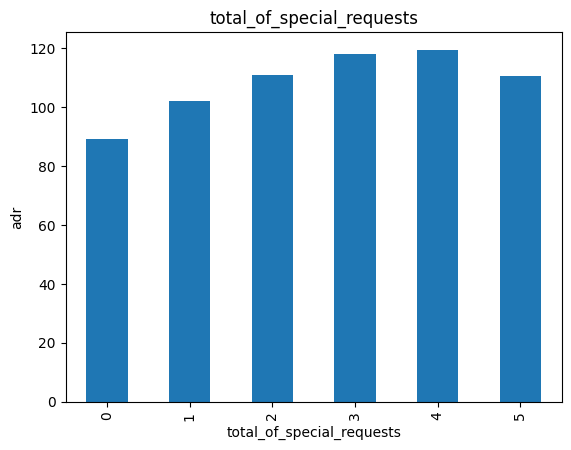

In [51]:
# let find the relationship between the discrete feature and adr(price)
for feature in discreteFeature:
    data = df.copy()
    data.groupby(feature)['adr'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('adr')
    plt.xlabel(feature)
    plt.show()

Continuous variable

In [56]:
continuousFeature = [feature for feature in numericalFeature if feature not in discreteFeature]
print("Continuous feature Count {}".format(len(continuousFeature)))

Continuous feature Count 9


In [58]:
df[continuousFeature].head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,NaN,NaN,0,0.0
1,737,27,1,0,0,NaN,NaN,0,0.0
2,7,27,1,1,0,NaN,NaN,0,75.0
3,13,27,1,1,0,304.0,NaN,0,75.0
4,14,27,1,2,0,240.0,NaN,0,98.0


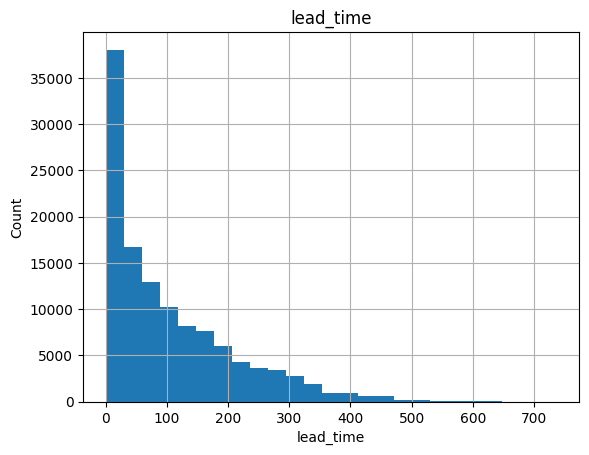

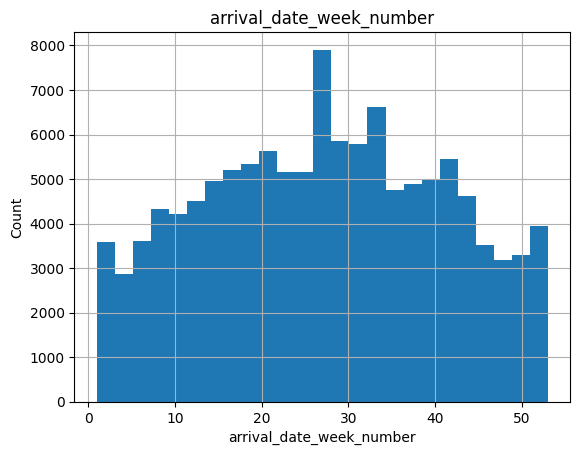

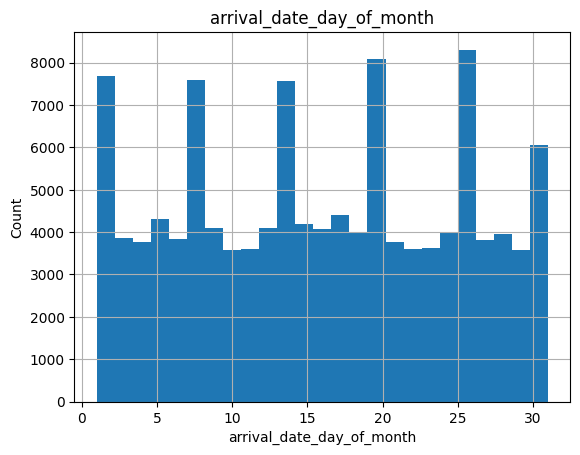

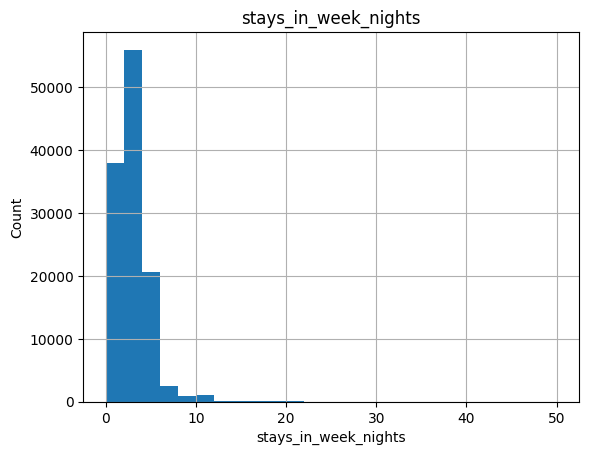

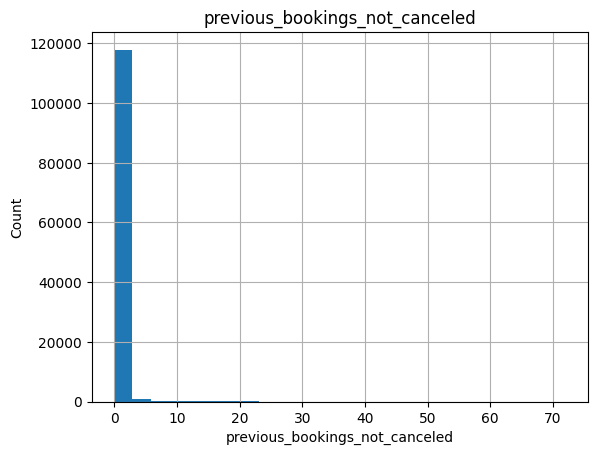

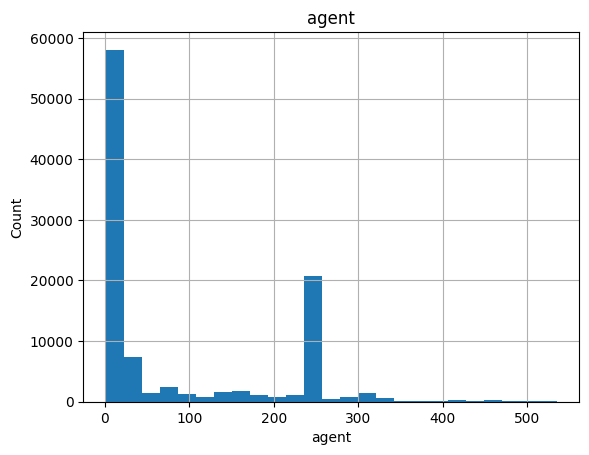

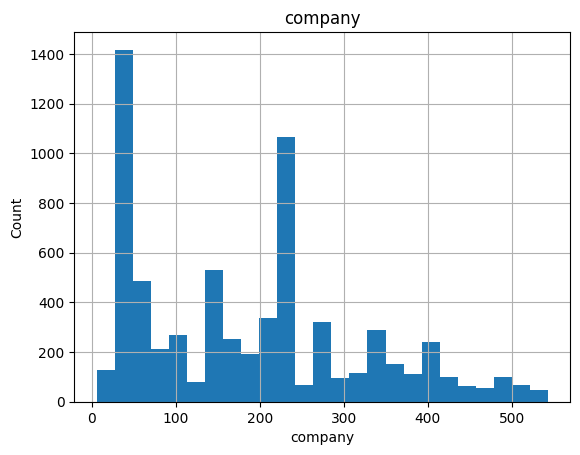

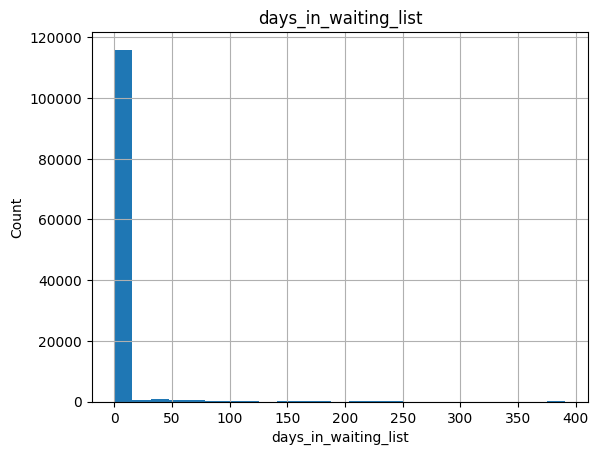

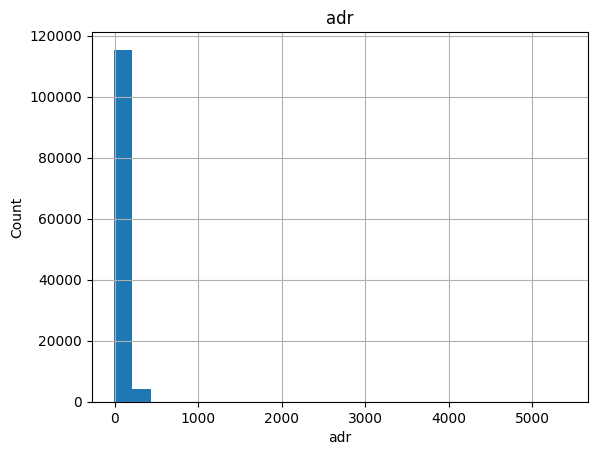

In [70]:
for feature in continuousFeature:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Outliers

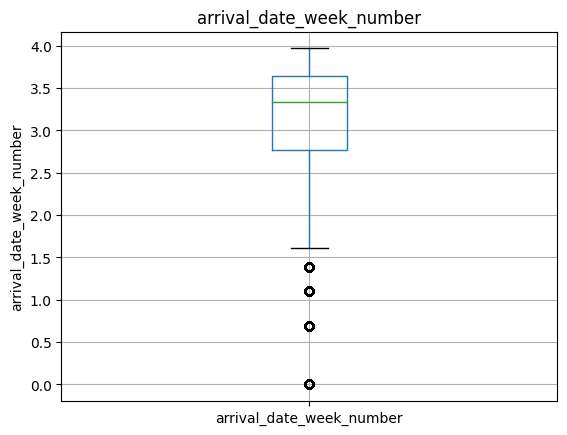

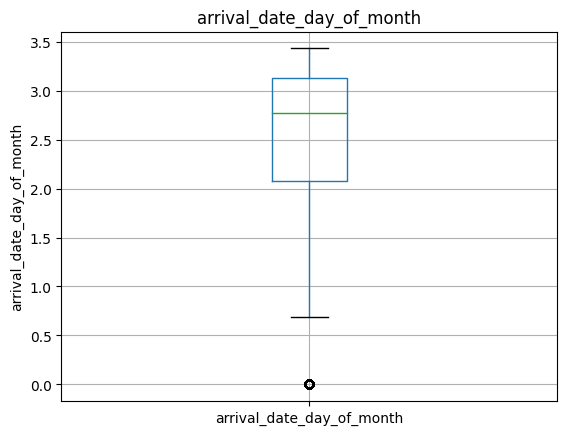

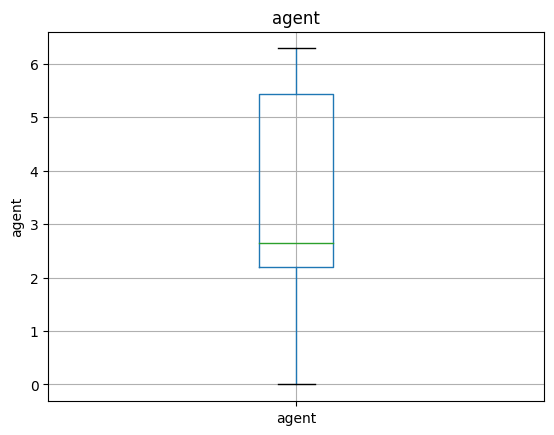

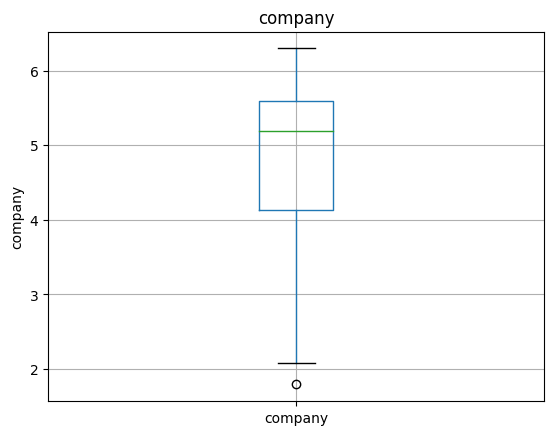

In [86]:
ZeroData = []
for feature in continuousFeature:
    data=df.copy()
    if 0 in data[feature].unique():
        ZeroData.append(feature)
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [88]:
# This data having zero's
df[ZeroData].head()

,lead_time,stays_in_week_nights,previous_bookings_not_canceled,days_in_waiting_list,adr
0,342,0,0,0,0.0
1,737,0,0,0,0.0
2,7,1,0,0,75.0
3,13,1,0,0,75.0
4,14,2,0,0,98.0


# Categorical Variables

In [93]:
categoricalFeature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features:{}'.format(len(categoricalFeature)))

Number of categorical features:12


In [95]:
df[categoricalFeature].head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [96]:
for feature in categoricalFeature:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is hotel and number of categories are 2
The feature is arrival_date_month and number of categories are 12
The feature is meal and number of categories are 5
The feature is country and number of categories are 178
The feature is market_segment and number of categories are 8
The feature is distribution_channel and number of categories are 5
The feature is reserved_room_type and number of categories are 10
The feature is assigned_room_type and number of categories are 12
The feature is deposit_type and number of categories are 3
The feature is customer_type and number of categories are 4
The feature is reservation_status and number of categories are 3
The feature is reservation_status_date and number of categories are 926


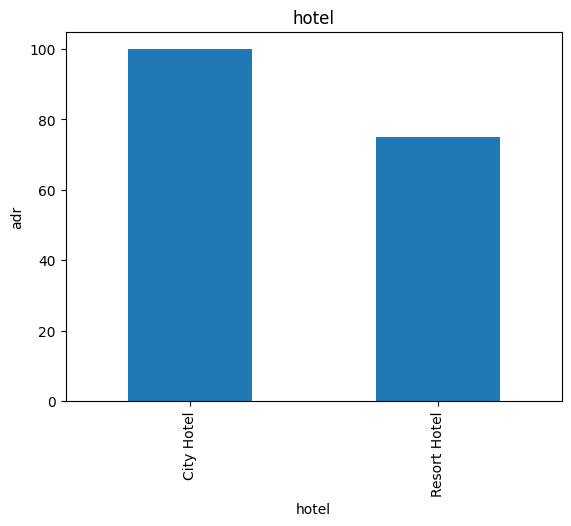

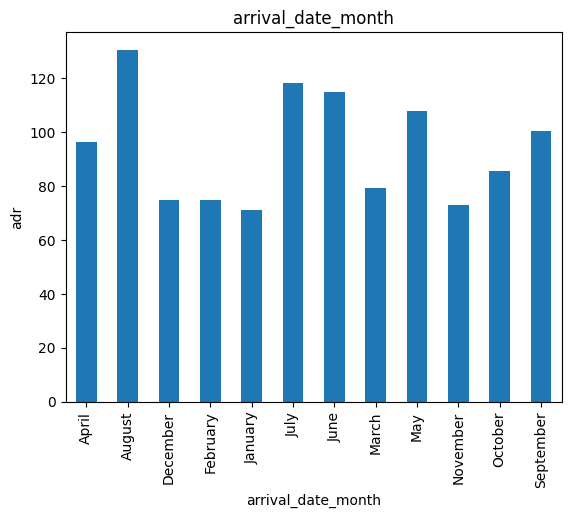

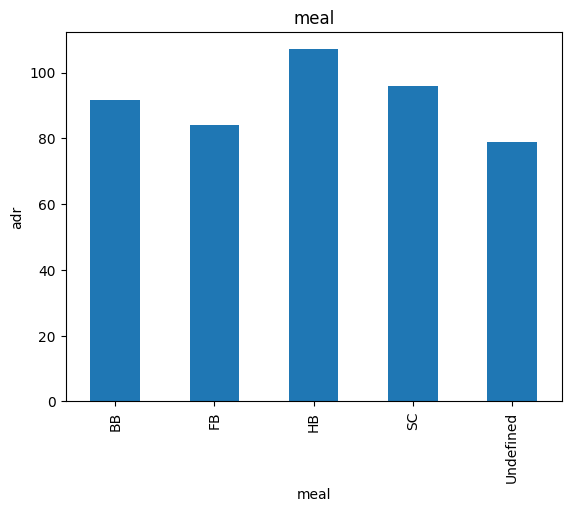

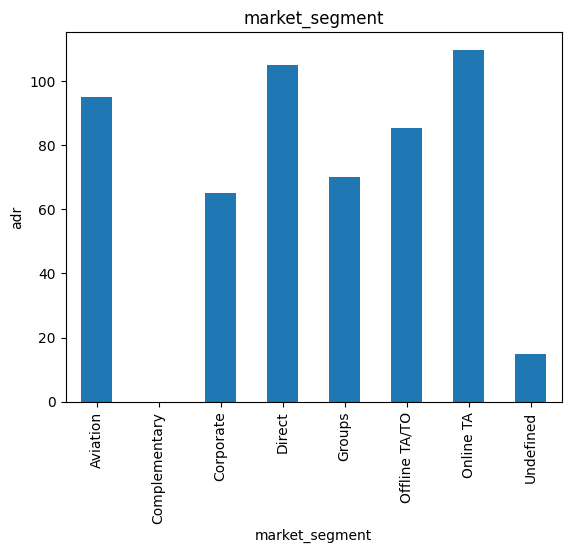

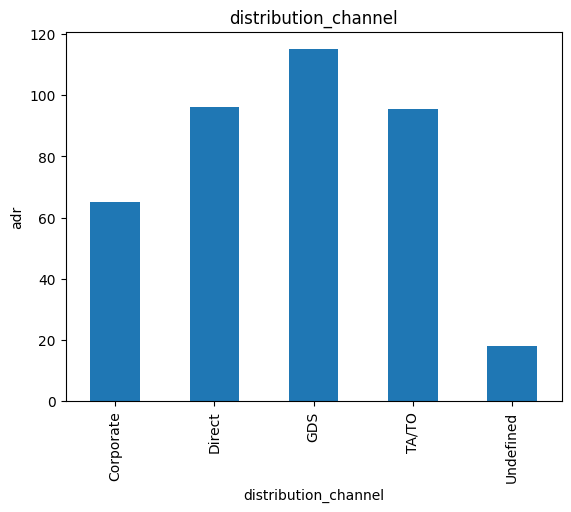

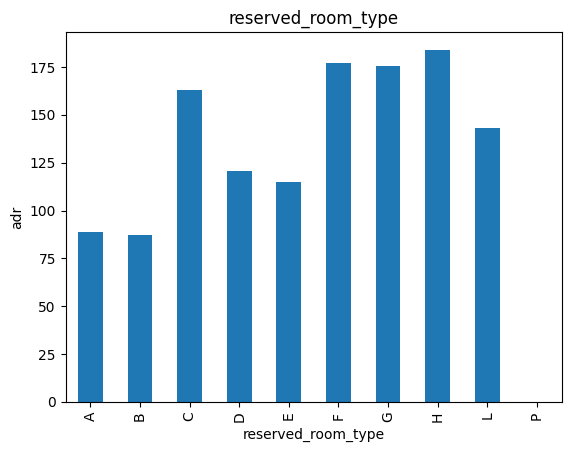

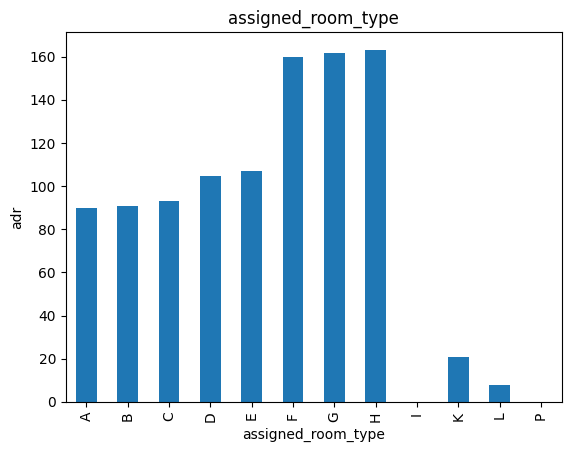

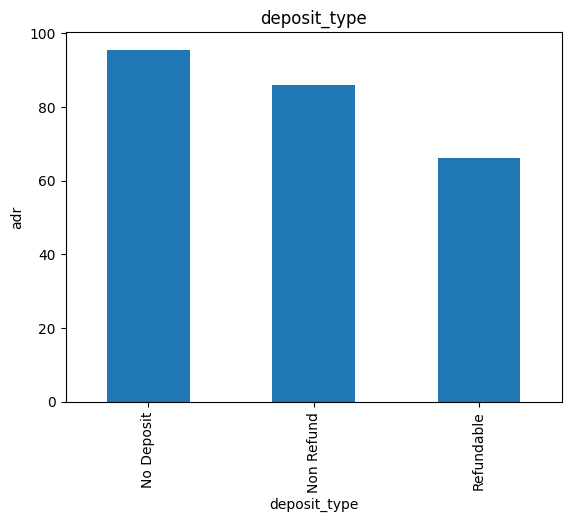

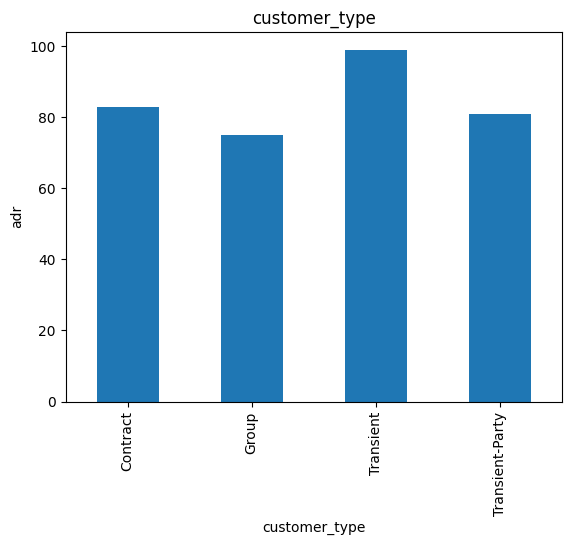

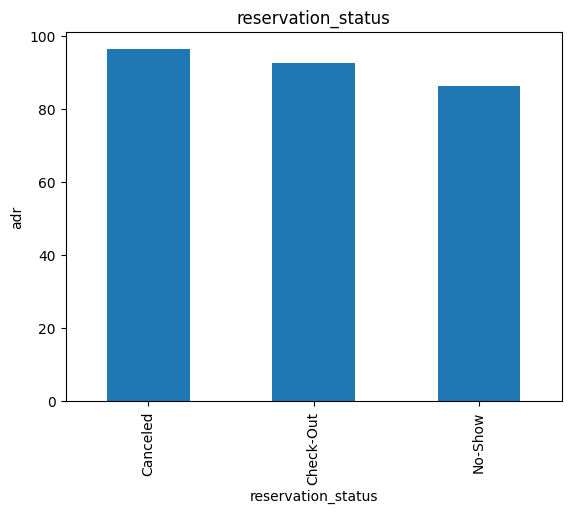

In [99]:
for feature in categoricalFeature:
    data = df.copy()
    if len(data[feature].unique()) < 25:
        data.groupby(feature)['adr'].median().plot.bar()
        plt.ylabel('adr')
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()